### Student Information
Name: 劉丞侑 (Cheng-You Liou)

Student ID: 114065536

GitHub ID: ChengYou-Liou

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Data preparation

In [7]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh


In [8]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
#Check the type of the dataframe
print(type(df))
#Check the shape of the dataframe
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(847, 16)


Print the first 3 samples of the dataset

In [9]:
df[0:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [10]:
df[-5:]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.0,0.0,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0
846,comment,2025-04-12 3:09:06,mmobyz1,wallstreetbets,Someone post the hotline please.,I_am_Nerman,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,![img](emote|t5_2th52|31224),0.0,0.0,0.0,"['img', ']', '[', 'emote|t5_2th52|31224']",0.0


In [11]:
df[:10][["author", "title", "sentiment"]]

,author,title,sentiment
0,StickyTip420,Retardation is on the menu boys! WSB is so back,-1.0
1,Comfortable-Dog-8437,Retail giant TARGET has now declined for 10 co...,1.0
2,Btankersly66,How do you feel about a sitting president maki...,0.0
3,emiljenfn,Who knows more? $VMAR,1.0
4,Just-Big6411,The Trump administration is begging Xi Jinping...,0.0
5,PolarNimbus,Weekend Discussion Thread for the Weekend of A...,1.0
6,stoniey84,Is the market in complete denial right now?,-1.0
7,OSRSkarma,Retardation is on the menu boys! WSB is so back,1.0
8,Blondbox,"It's fucking awful seeing the ""Silver"" misinfo...",1.0
9,Zumuru,Any cheap stocks under $10?,0.0


### Missing Values

In [12]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [13]:
#df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


Too many NaN in downvotes and upvote_ratio columns, so we keep those rows containing them

In [14]:
print(df.shape)

(847, 16)


### Duplicate Data

In [15]:
df.duplicated()
sum(df.duplicated())

0

## Data Preprocessing

### Sampling

In [16]:
df_sample = df.sample(n=200)

In [17]:
df_sample[0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
503,comment,2025-04-11 10:22:46,mmjfg77,StockMarket,🚨China responds to Trump’s 145% tariff with an...,LambDaddyDev,https://i.redd.it/2f7y4h6226ue1.jpeg,1,NaN,NaN,Super curious if you’ll delete this comment in...,0.855556,-0.130556,-1.0,"['Super', 'comment', 'delete', 'RemindMe']",0.0
705,comment,2022-01-13 22:42:29,hsjt4uw,stockstobuytoday,$BBIG trending up last two days,7hurricanes,https://www.reddit.com/r/stockstobuytoday/comm...,3,NaN,NaN,Expecting the PR to be dropped any day on the ...,0.000000,0.000000,0.0,"['TYDE', 'day', 'PR', 'date', 'dividend', 'rec...",1.0
798,comment,2025-04-12 2:09:13,mmo31vd,wallstreetbets,Someone post the hotline please.,WebHead1287,https://i.redd.it/tcfuu97p7bue1.jpeg,3,NaN,NaN,/,0.000000,0.000000,0.0,['/'],0.0
426,post,2021-11-04 12:40:28,qmjo5n,stockstobuytoday,"New to trading, please help!",Mariast0ckQueen,https://www.reddit.com/r/stockstobuytoday/comm...,13,0.0,1.0,Looking for advice on influencers and analysts...,0.000000,0.000000,0.0,['advice'],0.0
726,comment,2021-02-01 13:59:43,gllk1x0,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",KingRigr,https://www.reddit.com/r/stocks/comments/la34b...,5,NaN,NaN,"Too late, I bought Silver and a shit ton of Mi...",0.488889,-0.166667,-1.0,"['year', 'ton', 'Silver', 'Too']",0.0


In [18]:
import matplotlib.pyplot as plt
import plotly 

Print the samples based on the subreddit

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit', ylabel='Count'>

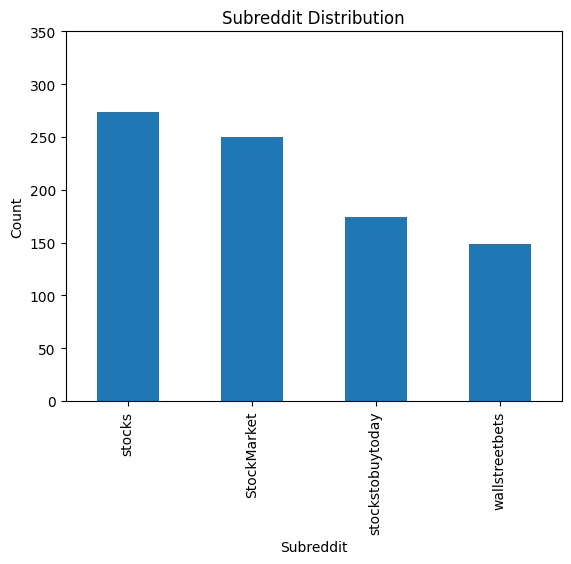

In [19]:
print(df.subreddit.value_counts())

df.subreddit.value_counts().plot(kind='bar',
                                 title='Subreddit Distribution',
                                 xlabel='Subreddit',
                                 ylabel='Count',
                                 ylim = [0, 350])

subreddit
StockMarket         61
stocks              56
stockstobuytoday    50
wallstreetbets      33
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit', ylabel='Count'>

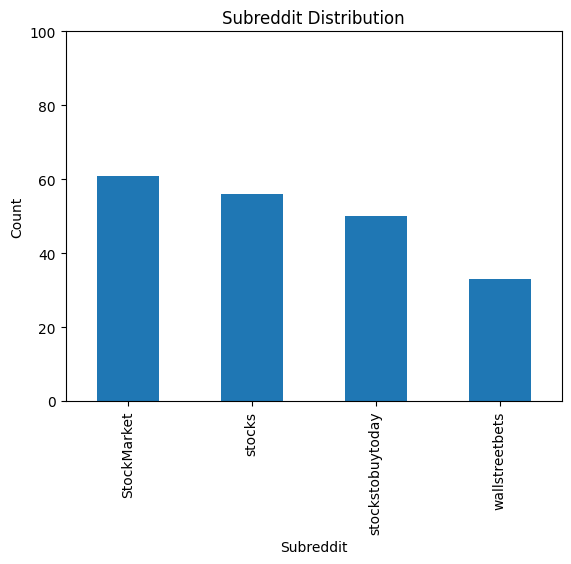

In [20]:
print(df_sample.subreddit.value_counts())

df_sample.subreddit.value_counts().plot(kind='bar',
                                 title='Subreddit Distribution',
                                 xlabel='Subreddit',
                                 ylabel='Count',
                                 ylim = [0, 100])

Print based on sentiment

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Count'>

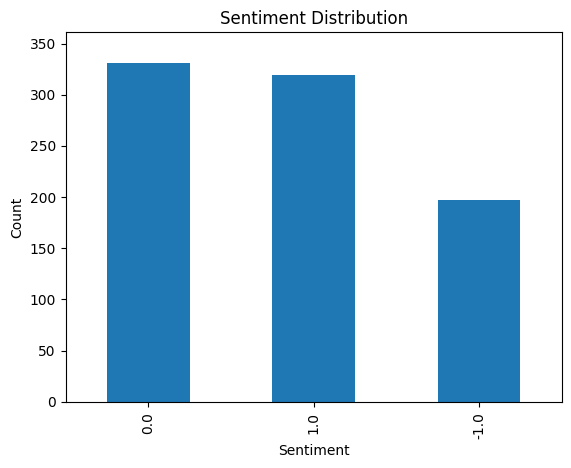

In [21]:
print(df.sentiment.value_counts())

df.sentiment.value_counts().plot(kind='bar',
                                 title='Sentiment Distribution',
                                 xlabel='Sentiment',
                                 ylabel='Count',
                                 ylim = [0, df.sentiment.value_counts().max() + 30])

sentiment
 1.0    79
 0.0    73
-1.0    48
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Count'>

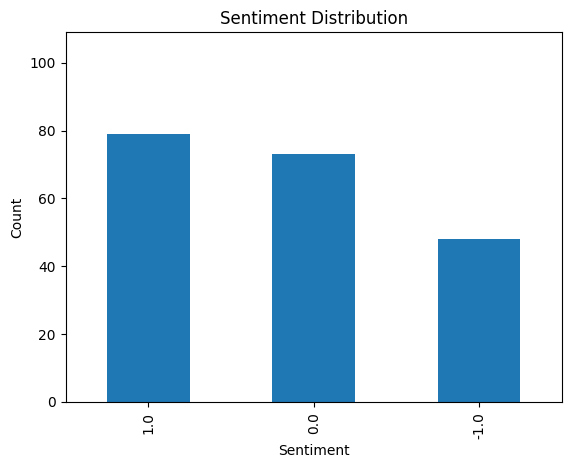

In [22]:
print(df_sample.sentiment.value_counts())

df_sample.sentiment.value_counts().plot(kind='bar',
                                 title='Sentiment Distribution',
                                 xlabel='Sentiment',
                                 ylabel='Count',
                                 ylim = [0, df_sample.sentiment.value_counts().max() + 30])

Do a side-by-side comparison 

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

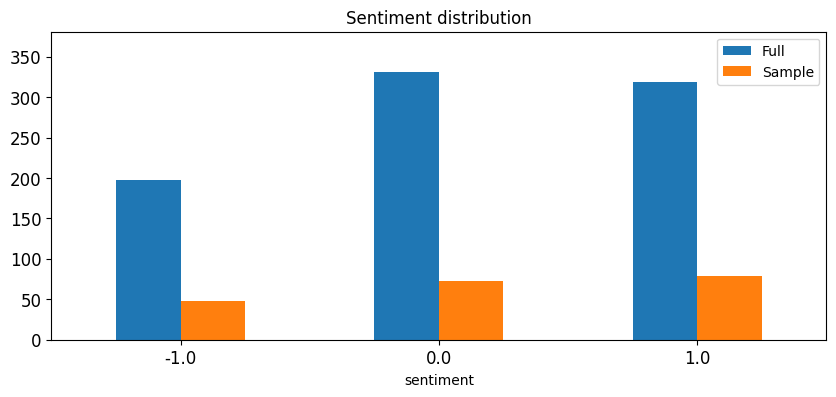

In [23]:
# Answer here
counts_sample = df_sample.sentiment.value_counts()
counts_full = df.sentiment.value_counts()

comparison = pd.DataFrame(
    {
        "Full":counts_full,
        "Sample":counts_sample, 
    }
)

comparison.plot(
    kind="bar",
    figsize=(10, 4),
    rot=0,
    fontsize=12,
    title="Sentiment distribution",
    ylim=[0, counts_full.max() + 50]
)

### Feature Creation

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
df_counts = count_vect.fit_transform(df.text)

In [25]:
analyze = count_vect.build_analyzer()
print(analyze("This is a sample sentence, showing off the stop words filtration."))

['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


In [26]:
analyze(df.text[20])

['nooo', 'dont', 'smug', 'bull', 'day']

In [27]:
df_counts.shape

(847, 4105)

In [28]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [29]:
df_counts[100:105, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Plot the heat map with seaborn

In [30]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

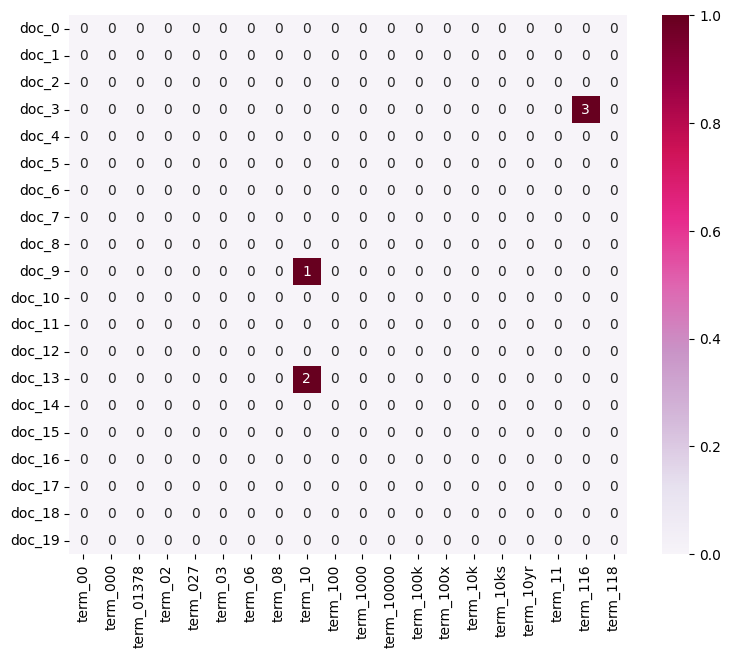

In [31]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

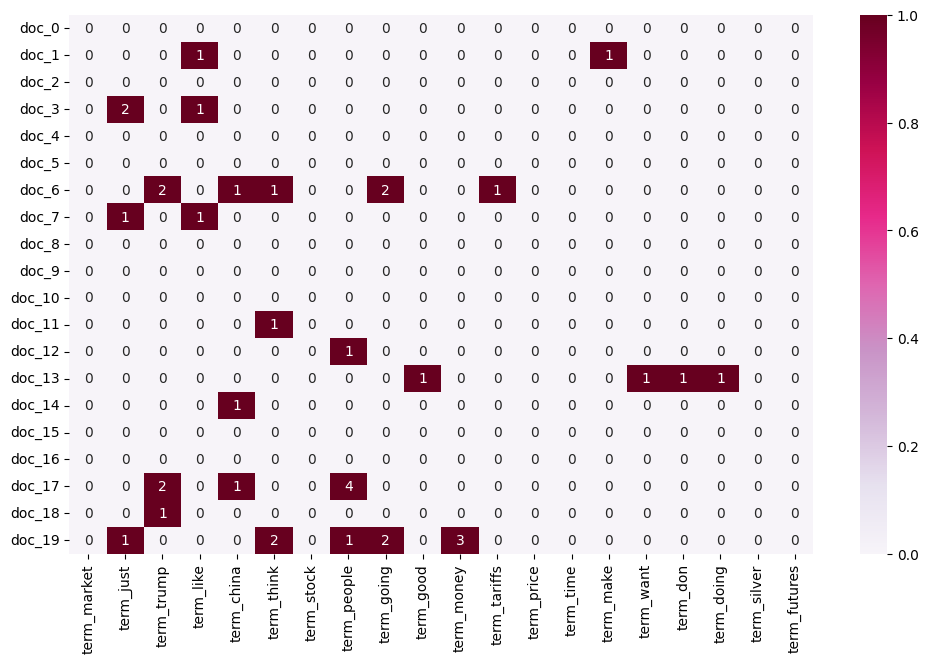

In [32]:
N = 20
term_frequencies = np.array(df_counts.sum(axis=0)).ravel()
top_idx = term_frequencies.argsort()[-N:][::-1]
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_idx]]


M = 20
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:M]]
plot_z = df_counts[0:M, top_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.figure(figsize=(12, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Transform Text Data

In [33]:
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:, j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

/var/folders/kx/m437w_zn5rgfvvxgpk4hgq880000gn/T/ipykernel_54918/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


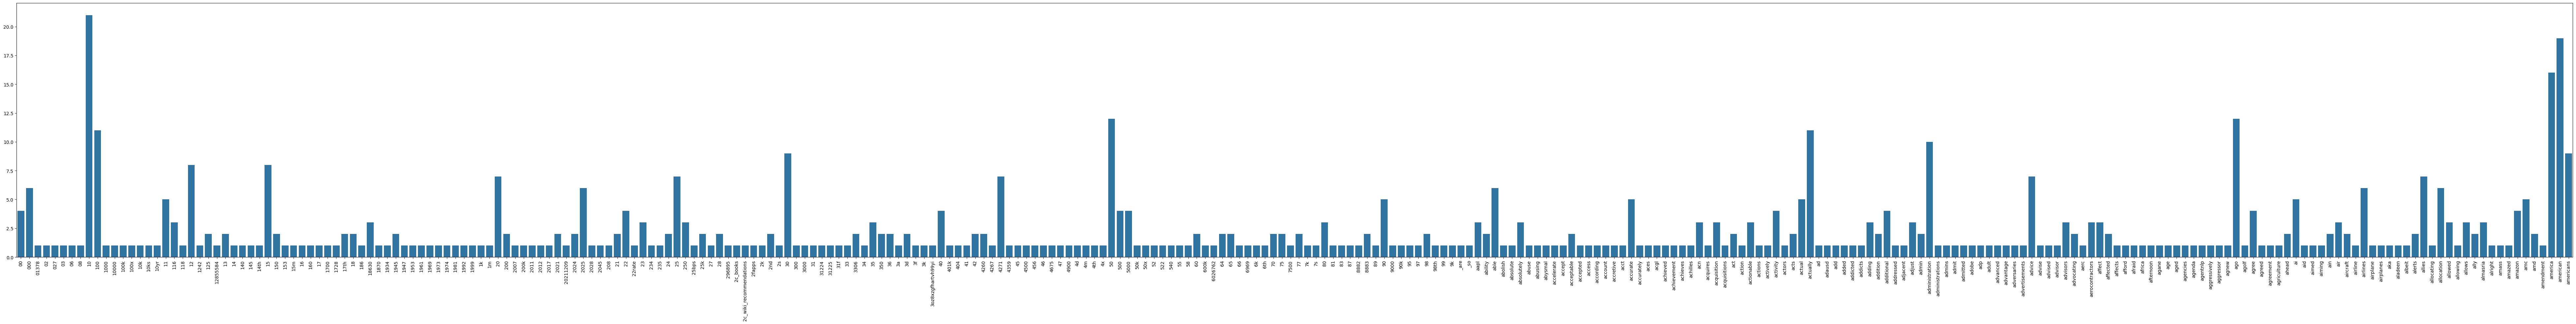

In [34]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [35]:
import plotly.express as px

df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(df_terms, 
             x="term", 
             y="frequency",
             title="Top 300 Terms by Frequency",
             labels={"term": "Vocabulary Term", "frequency": "Frequency"})


fig.update_layout(xaxis_tickangle=-90, width=1200, height=500)

In [36]:
#We try to visualize Top-N most frequent terms
N = 50  # how many top terms to visualize
top_idx = term_frequencies.argsort()[-N:][::-1]

df_top = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[top_idx],
    "frequency": term_frequencies[top_idx]
})

fig = px.bar(df_top, x="term", y="frequency",
             title=f"Top {N} Most Frequent Terms")
fig.update_layout(xaxis_tickangle=-90, width=1000, height=500)
fig.show()

Change the frequency into log scale

In [37]:
# Answer here
N = 50  # how many top terms to visualize
top_idx = term_frequencies.argsort()[-N:][::-1]

df_top = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[top_idx],
    "frequency": np.log(term_frequencies[top_idx])
})

fig = px.bar(df_top, x="term", y="frequency",
             title=f"Top {N} Most Frequent Terms")
fig.update_layout(xaxis_tickangle=-90, width=1000, height=500)
fig.show()

## Most frequent term based on sentiment

The following is the new data visualization for the third part of phase 1

Step 1. Collect term frequencies into pandas data frame

In [38]:
#Most frequent term based on sentiment
import plotly.express as px

N = 20  # Top N per sentiment
sentiments = df['sentiment'].unique()
print(sentiments)

df_top_sentiments = []

for s in sentiments:
    # Subset rows belonging to this sentiment
    mask = df['sentiment'] == s
    X_s = df_counts[mask]
    
    # Sum term frequencies
    term_freq_s = np.array(X_s.sum(axis=0)).ravel()
    top_idx_s = term_freq_s.argsort()[-N:][::-1]

    
    # Store results
    df_top_sentiments.append(pd.DataFrame({
        "sentiment": s,
        "term": count_vect.get_feature_names_out()[top_idx_s],
        "frequency": term_freq_s[top_idx_s]
    }))

df_top_sentiments = pd.concat(df_top_sentiments, ignore_index=True)

[-1.  1.  0.]


Step 2. Plot with plotly

In [39]:
fig = px.bar(df_top_sentiments,
             x="term", y="frequency",
             facet_col="sentiment",
             color="sentiment",
             facet_col_wrap=3,
             title=f"Top {N} Most Frequent Terms by Sentiment")

fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)
fig.show()

# Phase 2

## 2. Second: follow the same process from the [DM2025-Lab1-Master]

In [40]:
### Begin Assignment Here

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [42]:

# Create term-document frequency matrices for each label
# in the new Reddit Stock Sentiment dataset

# 1. Load the new dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Inspect the structure
print("DataFrame type:", type(df))
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# 2. Identify which columns to use
# 'text' = content of post/comment
# 'label' = sentiment label (1.0 positive, 0.0 negative or neutral)
print(df[['text', 'label']].head())

# 3. Get unique sentiment labels
labels = df['label'].unique()
print("Unique labels:", labels)

# 4. Create separate DataFrames for each sentiment label
label_dfs = {}
for lbl in labels:
    label_dfs[lbl] = df[df['label'] == lbl].copy()

# 5. Function to create a term-document frequency DataFrame
def create_term_document_df(df_subset):
    count_vect = CountVectorizer(stop_words='english')  # remove stopwords for cleaner features
    X_counts = count_vect.fit_transform(df_subset['text'].astype(str))  # transform text to counts
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

# 6. Build term-document matrices for each label
filt_term_document_dfs = {}
for lbl in labels:
    filt_term_document_dfs[lbl] = create_term_document_df(label_dfs[lbl])
    print(f"Label {lbl}: term-document matrix shape = {filt_term_document_dfs[lbl].shape}")

# 7. Example: inspect frequent words for positive vs negative
for lbl in labels:
    print(f"\nTop words for label {lbl}:")
    word_sums = filt_term_document_dfs[lbl].sum(axis=0).sort_values(ascending=False)
    print(word_sums.head(10))

DataFrame type: <class 'pandas.core.frame.DataFrame'>
Shape: (847, 16)
Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0
3  Vision Marine Technologies Inc. is rewriting t...    1.0
4                           He didn’t say thank you.   -1.0
Unique labels: [-1.  0.  1.]
Label -1.0: term-document matrix shape = (315, 1982)
Label 0.0: term-document matrix shape = (423, 2529)
Label 1.0: term-document matrix shape = (109, 1008)

Top words for label -1.0:
trump     60
china     46
just      43
people    28
like      28
market    27
think     25
going     24
money     22
make      21
dtype: int64

Top words for label 0.

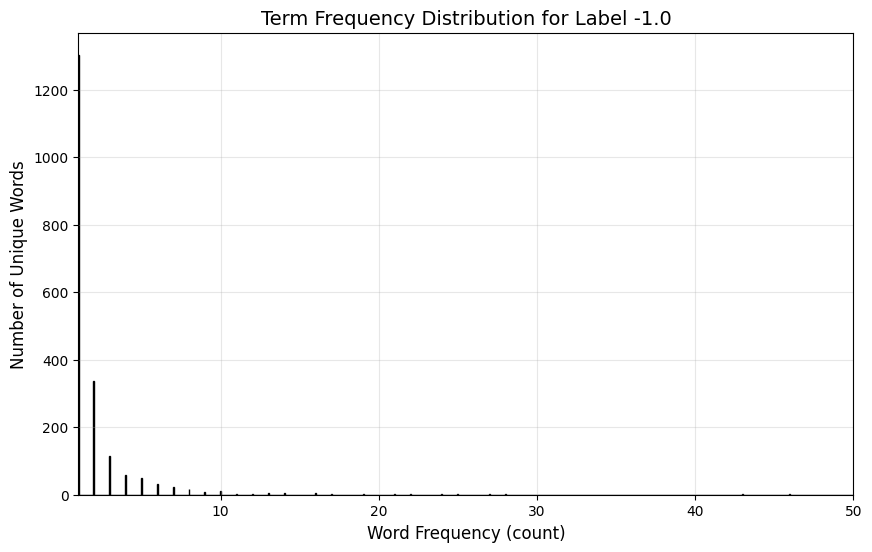

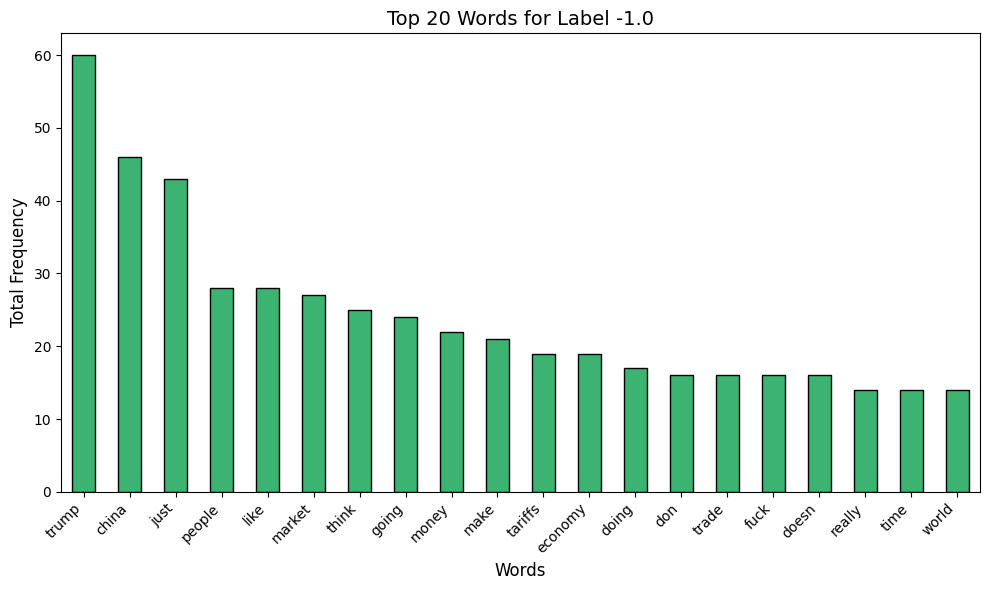

In [43]:

# Visualize Word Frequency Distributions for Reddit Sentiment Labels

# Choose a label to visualize
label_number = 0
selected_label = labels[label_number]

# 1.Histogram: Term Frequency Distribution
word_counts = filt_term_document_dfs[selected_label].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=1000, color='steelblue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Label {selected_label}', fontsize=14)
plt.xlabel('Word Frequency (count)', fontsize=12)
plt.ylabel('Number of Unique Words', fontsize=12)
plt.xlim(1, 50)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Bar Chart: Top 20 Most Frequent Words ---
word_sums = filt_term_document_dfs[selected_label].sum(axis=0).sort_values(ascending=False)
top_words = word_sums.head(20)

plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title(f'Top 20 Words for Label {selected_label}', fontsize=14)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Total Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Label: -1.0
Total unique terms: 1982
Number of terms in top 5%: 99
Top 5% frequent terms:
['trump', 'china', 'just', 'people', 'like', 'market', 'think', 'going', 'money', 'make', 'economy', 'tariffs', 'doing', 'trade', 'don', 'doesn', 'fuck', 'world', 'time', 'really', 'good', 'xi', 'wants', 'american', 'point', 'shit', 'literally', 'bad', 'dollar', 'end']


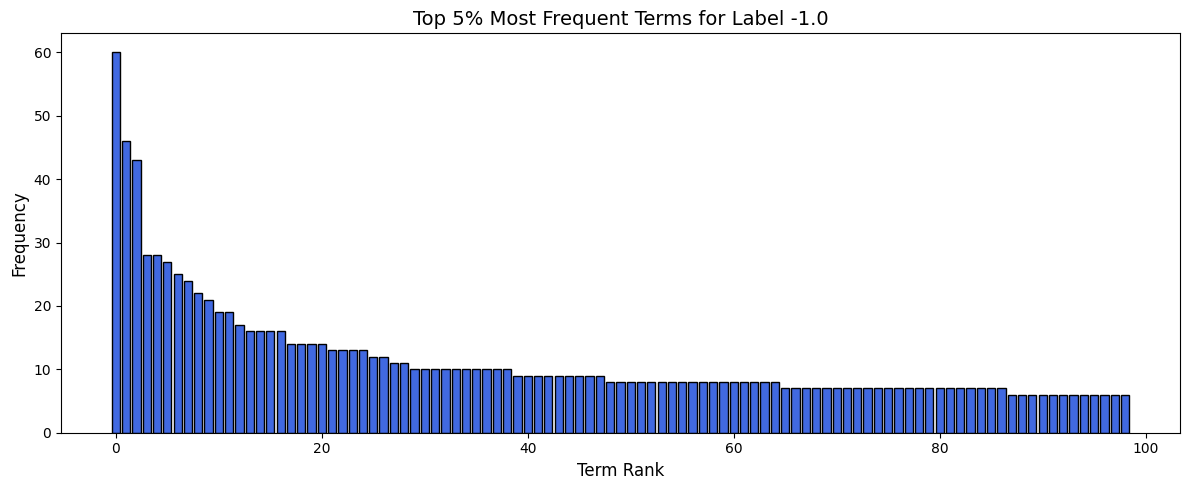

Label: 0.0
Total unique terms: 2529
Number of terms in top 5%: 126
Top 5% frequent terms:
['market', 'like', 'stock', 'just', 'futures', 'price', 'x200b', 'trump', 'china', 'want', 'company', 'stockbuyvest', 'com', 'money', 'people', 'stocks', 'think', 'year', 'good', 'today', 'does', 'going', 'did', '10', 'don', 'years', 'right', 'new', 'silver', 'tariffs']


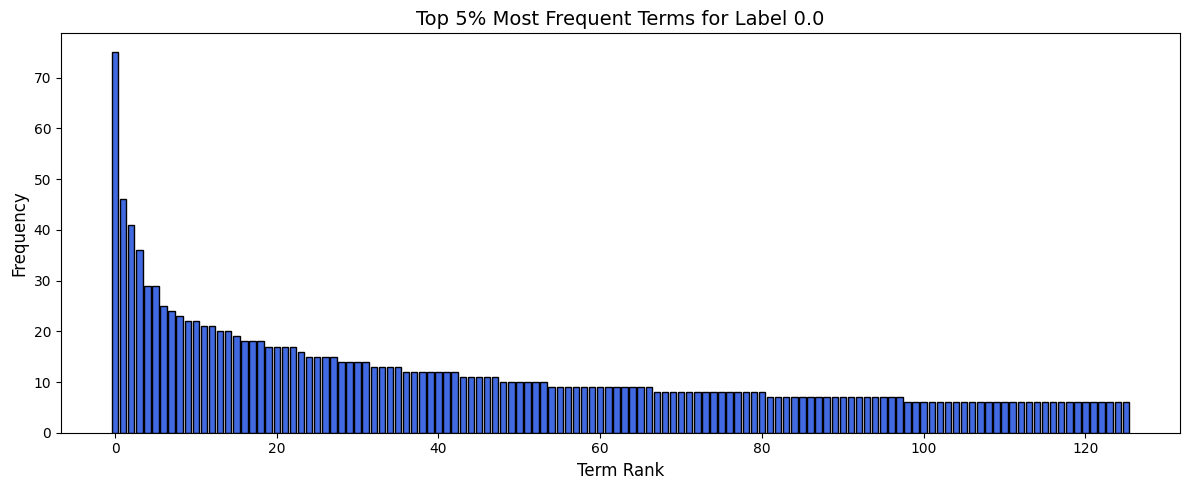

Label: 1.0
Total unique terms: 1008
Number of terms in top 5%: 50
Top 5% frequent terms:
['just', 'good', 'technology', 'star', 'think', 'market', 'lithium', 'going', 'doing', 'silver', 'time', 'like', 'aviation', 'trump', 'potential', 'inflight', 'analysis', 'economy', 'data', 'electric', 'real', 'way', 'long', 'airlines', 'tariffs', 'cse', 'new', 'dividend', 'company', 'safety']


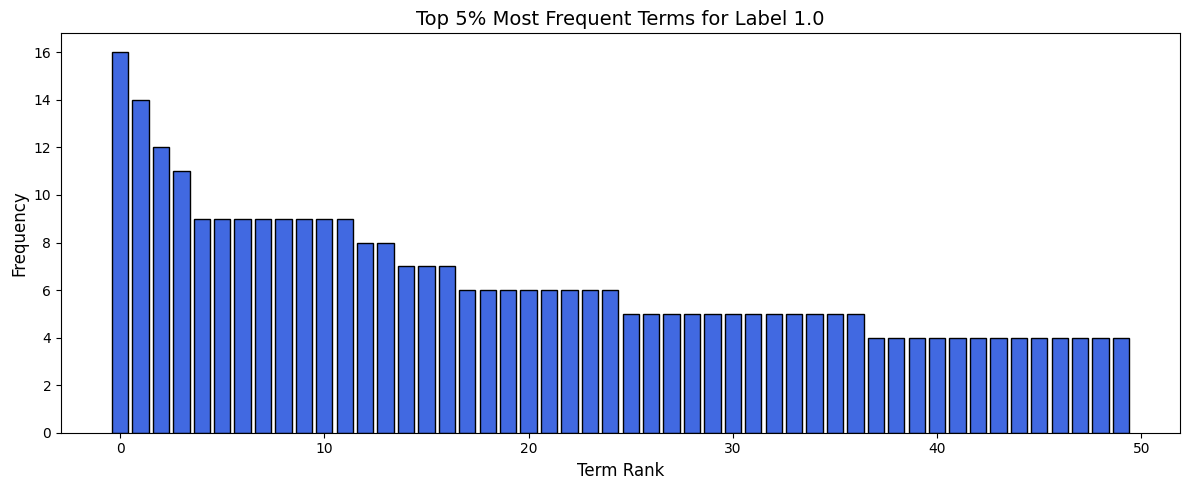

In [44]:
# Loop through each sentiment label (0.0, 1.0, etc.)
for lbl in labels:
    print(f"Label: {lbl}")

    # Step 1: Compute total frequency of each word
    word_counts = filt_term_document_dfs[lbl].sum(axis=0).to_numpy()

    # Step 2: Sort term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]    # indices sorted by frequency
    sorted_counts = np.sort(word_counts)[::-1]        # frequency values sorted

    # Step 3: Calculate top 5% cutoff
    total_terms = len(sorted_counts)
    top_5_percent_index = max(1, int(0.05 * total_terms))  # ensure ≥1 term
    top_5_percent_indices = sorted_indices[:top_5_percent_index]

    # Step 4: Retrieve term names
    filtered_words = [
        filt_term_document_dfs[lbl].columns[i] for i in top_5_percent_indices
    ]

    # Step 5: Display summary
    print(f"Total unique terms: {total_terms}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Top 5% frequent terms:\n{filtered_words[:30]}")  # print first 30 words for brevity

    # Step 6: Visualize frequency distribution of top 5%
    top_counts = sorted_counts[:top_5_percent_index]

    plt.figure(figsize=(12, 5))
    plt.bar(range(top_5_percent_index), top_counts, color='royalblue', edgecolor='black')
    plt.title(f"Top 5% Most Frequent Terms for Label {lbl}", fontsize=14)
    plt.xlabel("Term Rank", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.tight_layout()
    plt.show()

Check out the bottom 1% words

In [45]:

# Filter Bottom 1% and Top 5% Words by Global Frequency
# (applied per sentiment label in the Reddit Stock Sentiment dataset)


label_number = 0  # Change to 1 if you want to inspect the other label (e.g., 0.0 → negative/neutral, 1.0 → positive)

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    """
    Removes the most and least frequent words (based on total count)
    from a term-document frequency DataFrame.
    """
    # 1.Compute total frequency per word across all documents
    word_sums = term_document_df.sum(axis=0)

    # 2.Sort by total frequency
    sorted_words = word_sums.sort_values()

    # 3.Compute cutoff counts for top and bottom percentages
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # 4.Identify which words to remove
    words_to_remove = pd.concat([
        sorted_words.head(bottom_n),   # bottom 1%
        sorted_words.tail(top_n)       # top 5%
    ]).index

    # 5.Print diagnostics
    print(f"Bottom {bottom_percent*100:.0f}% ({bottom_n}) least frequent words:")
    print(sorted_words.head(bottom_n), "\n")
    print(f"Top {top_percent*100:.0f}% ({top_n}) most frequent words:")
    print(sorted_words.tail(top_n), "\n")

    # 6.Drop those columns and return the filtered DataFrame
    filtered_df = term_document_df.drop(columns=words_to_remove)
    print(f"Filtered DataFrame shape: {filtered_df.shape}")
    return filtered_df


# -------------------------------------------------------------
# Apply the filtering function to each sentiment label
# -------------------------------------------------------------
term_document_dfs = {}

for lbl in labels:
    print(f"\n=== Filtering words for sentiment label: {lbl} ===")
    term_document_dfs[lbl] = filter_top_bottom_words_by_sum(
        filt_term_document_dfs[lbl],
        top_percent=0.05,
        bottom_percent=0.01
    )

# -------------------------------------------------------------
# Example: inspect the filtered matrix for one label
# -------------------------------------------------------------
selected_label = labels[label_number]
print(f"\nFiltered Term-Document Frequency DataFrame for Label: {selected_label}")
display(term_document_dfs[selected_label].head())


=== Filtering words for sentiment label: -1.0 ===
Bottom 1% (19) least frequent words:
kidding          1
industries       1
indulging        1
individuals      1
individualism    1
indicted         1
india            1
indexes          1
incredibly       1
incredible       1
increasing       1
incompetent      1
skills           1
impose           1
importers        1
important        1
slowing          1
impeached        1
inequality       1
dtype: int64 

Top 5% (99) most frequent words:
ccp        6
happen     6
lost       6
lot        6
dont       6
          ..
like      28
people    28
just      43
china     46
trump     60
Length: 99, dtype: int64 

Filtered DataFrame shape: (315, 1864)

=== Filtering words for sentiment label: 0.0 ===
Bottom 1% (25) least frequent words:
zsil            1
shitting        1
image           1
shooting        1
illegal         1
ii              1
ignorance       1
shoppers        1
icu             1
ibit            1
ibd             1
impact    

,000,02,03,10,100,1000,10000,11,12,13,...,x200b,ya,yea,yeah,year,yields,yippee,yo,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of filtered DataFrames
for label in term_document_dfs:
    # Replace dots with underscores to ensure valid filenames
    label_safe = str(label).replace('.', '_')
    
    # Initialize the converter
    obj = DF2DB(term_document_dfs[label])
    
    # Convert to a transactional database CSV
    #   '>=', 1  means: treat every word whose count >= 1 as "present" (binary)
    #   Each row corresponds to a transaction (document)
    obj.convert2TransactionalDatabase(f'td_freq_db_{label_safe}.csv', '>=', 1)

Database size (total no of transactions) : 309
Number of items : 1864
Minimum Transaction Size : 1
Average Transaction Size : 8.928802588996763
Maximum Transaction Size : 108
Standard Deviation Transaction Size : 10.120061408053632
Variance in Transaction Sizes : 102.74816122388938
Sparsity : 0.9952098698556884


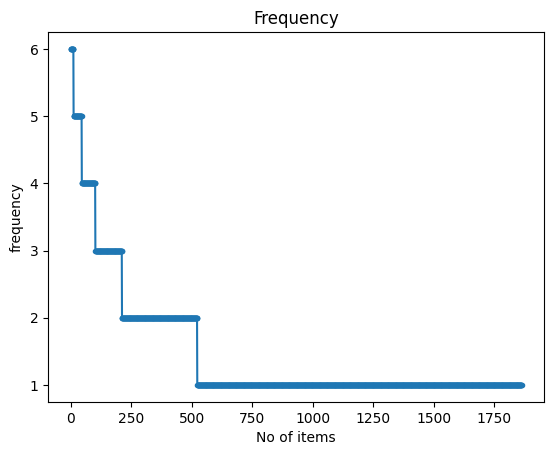

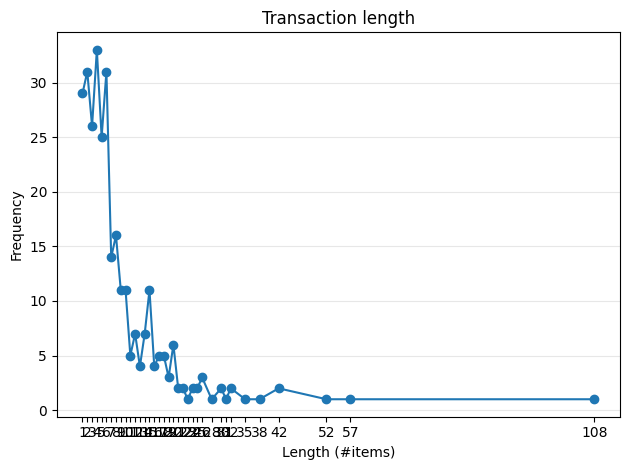

In [47]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_-1_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 106
Number of items : 948
Minimum Transaction Size : 1
Average Transaction Size : 11.018867924528301
Maximum Transaction Size : 77
Standard Deviation Transaction Size : 13.409361086798318
Variance in Transaction Sizes : 181.52345013477088
Sparsity : 0.9883767215985988


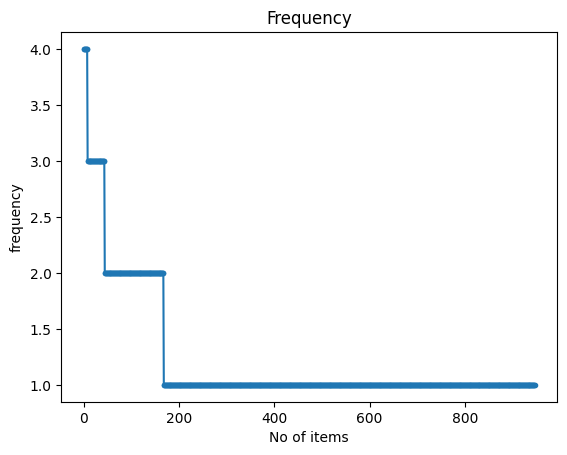

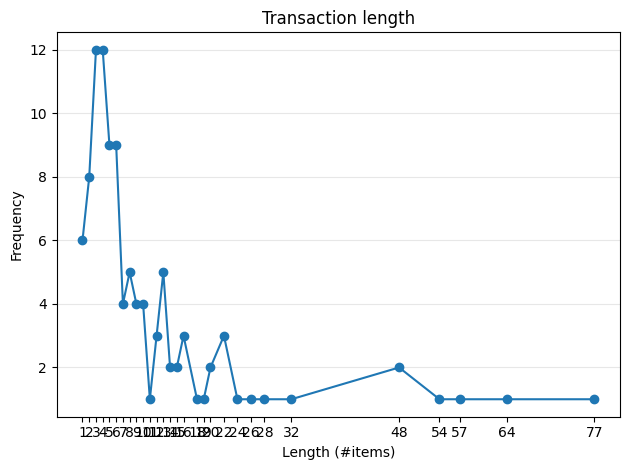

In [48]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_1_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 408
Number of items : 2378
Minimum Transaction Size : 1
Average Transaction Size : 8.71078431372549
Maximum Transaction Size : 173
Standard Deviation Transaction Size : 15.299291325781285
Variance in Transaction Sizes : 234.64342149636266
Sparsity : 0.9963369283794258


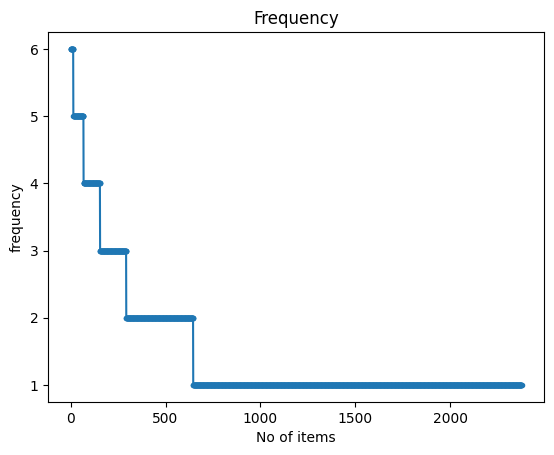

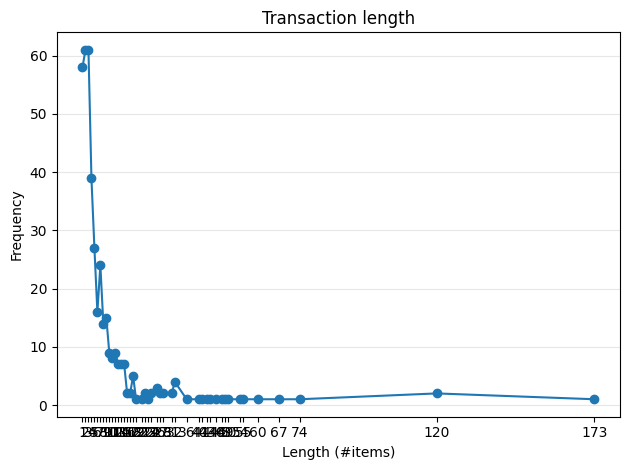

In [49]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_0_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [50]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_minus1= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_minus1))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 212
Runtime: 0.0017440319061279297


In [51]:
obj1.save('freq_patterns_-1_minSup3.txt') #save the patterns
frequentPatternsDF_minus1

,Patterns,Support
0,personally,3
1,starting,3
2,honestly,3
3,exactly,3
4,square,3
...,...,...
207,today,6
208,stock,6
209,moving,6
210,puts,6


In [52]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj2 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_1= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_1))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 45
Runtime: 0.0008590221405029297


In [53]:
obj2.save('freq_patterns_1_minSup3.txt') #save the patterns
frequentPatternsDF_1

,Patterns,Support
0,come,3
1,ll,3
2,main,3
3,making,3
4,points,3
5,points\tmain,3
6,tldr,3
7,green,3
8,perfectly,3
9,went,3


In [54]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_1, frequentPatternsDF_minus1]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
242     puts        6
241   moving        6
240   allies        6
239    power        6
238     look        6
..       ...      ...
89    damage        3
90      drop        3
91    effect        3
92       job        3
121   policy        3

[243 rows x 2 columns]
Number of patterns discarded: 14


In [55]:
X = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,nations,needs,reading,tank,hours,damage,drop,effect,job,policy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dimensionality Reduction

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [58]:
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

invalid value encountered in matmul

/Users

In [59]:
X_pca_tdm.shape

(847, 2)

In [60]:
X_tsne_tdm.shape

(847, 2)

In [61]:
X_umap_tdm.shape

(847, 2)

In [62]:
print(X.columns.tolist())

['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label', 'tokenized_text']


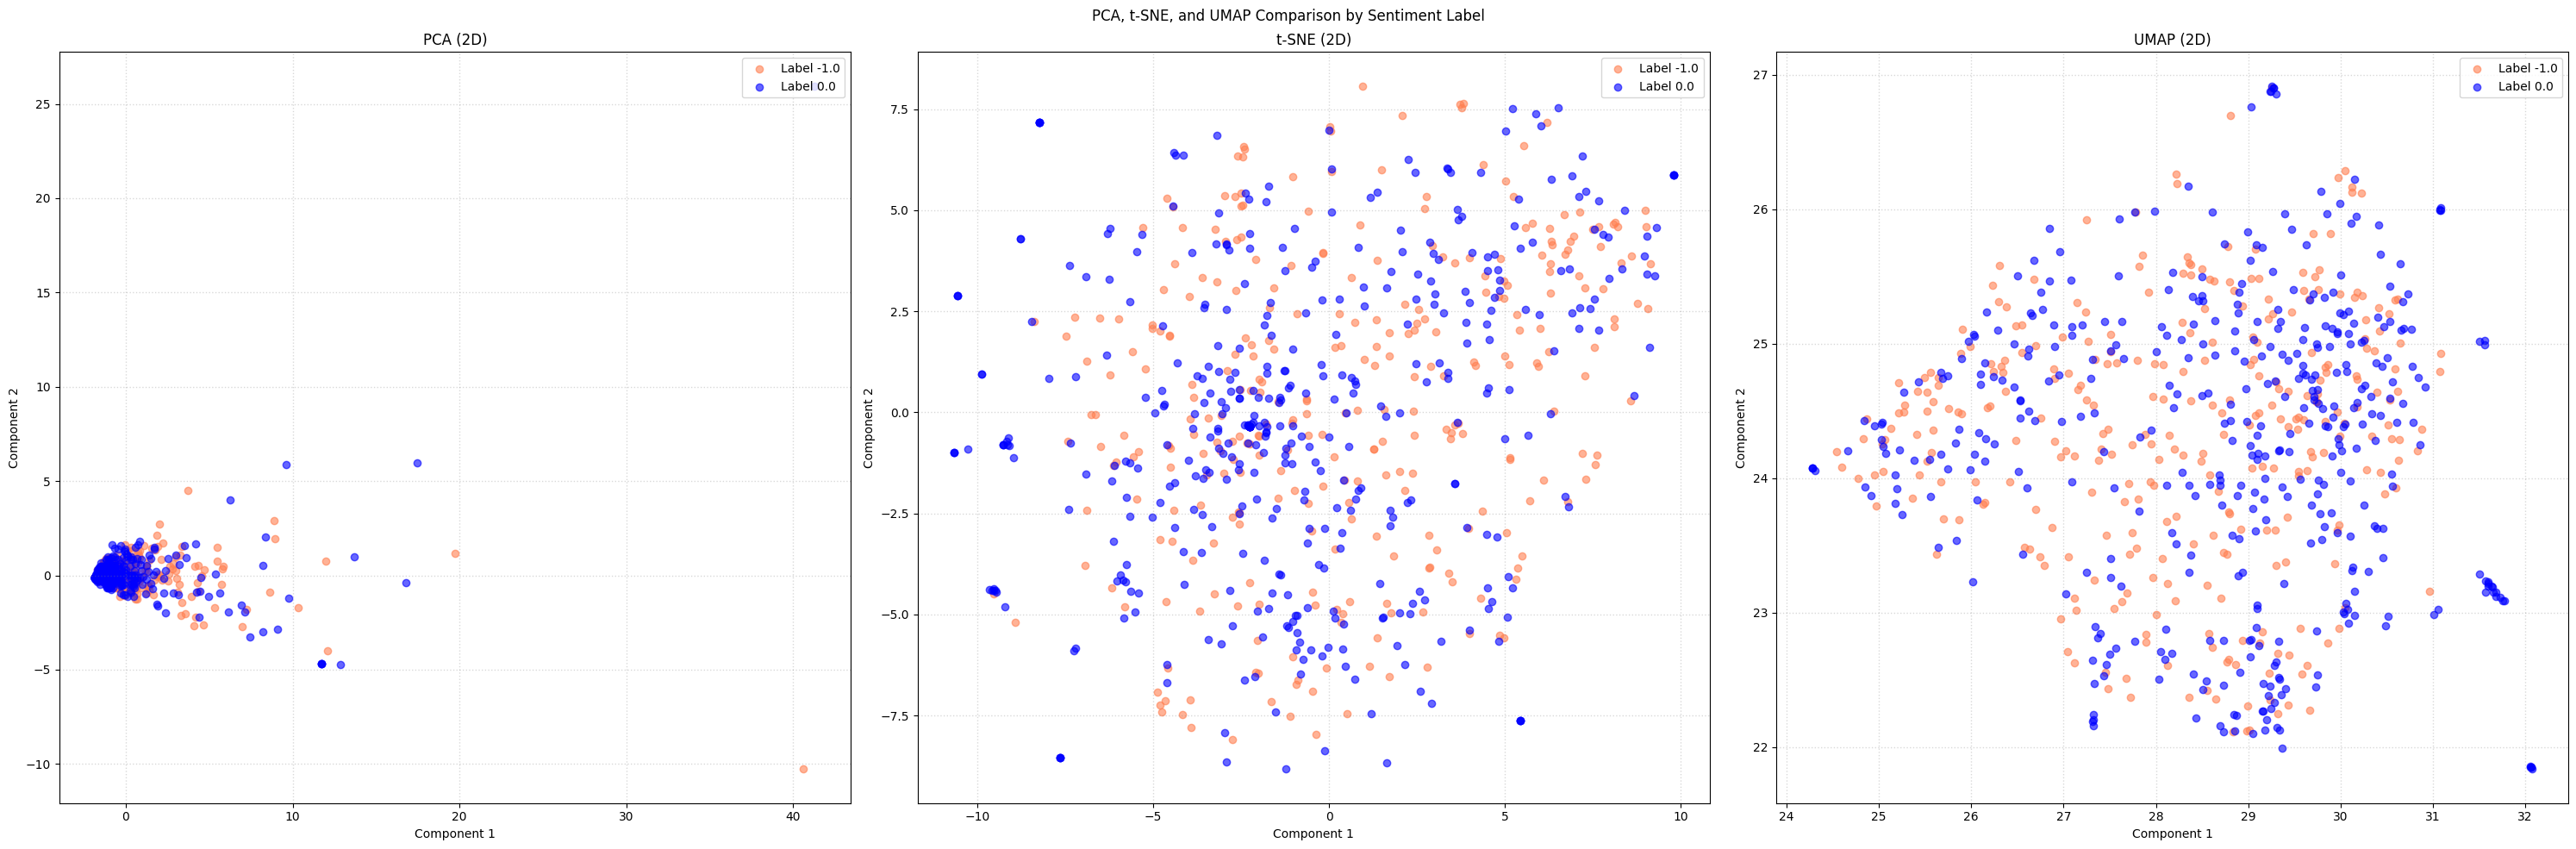

In [63]:

# 2D Visualization using PCA, t-SNE, and UMAP for Reddit Sentiment Dataset

import matplotlib.pyplot as plt

labels = X['label'].unique()
col = ['coral', 'blue']  # color palette

# Create 3 subplots for PCA, t-SNE, and UMAP
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison by Sentiment Label')

# Define helper function for scatter plots
def plot_scatter(ax, X_reduced, title):
    for c, lbl in zip(col, labels):
        xs = X_reduced[X['label'] == lbl, 0]
        ys = X_reduced[X['label'] == lbl, 1]
        ax.scatter(xs, ys, c=c, marker='o', label=f'Label {lbl}', alpha=0.6)
    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.3)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend(loc='upper right')

# Draw the three 2D visualizations
plot_scatter(axes[0], X_pca_tdm, 'PCA (2D)')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE (2D)')
plot_scatter(axes[2], X_umap_tdm, 'UMAP (2D)')

plt.tight_layout()
plt.show()

Then apply onto augmented data:

In [64]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

invalid value encountered in matmul

/Users

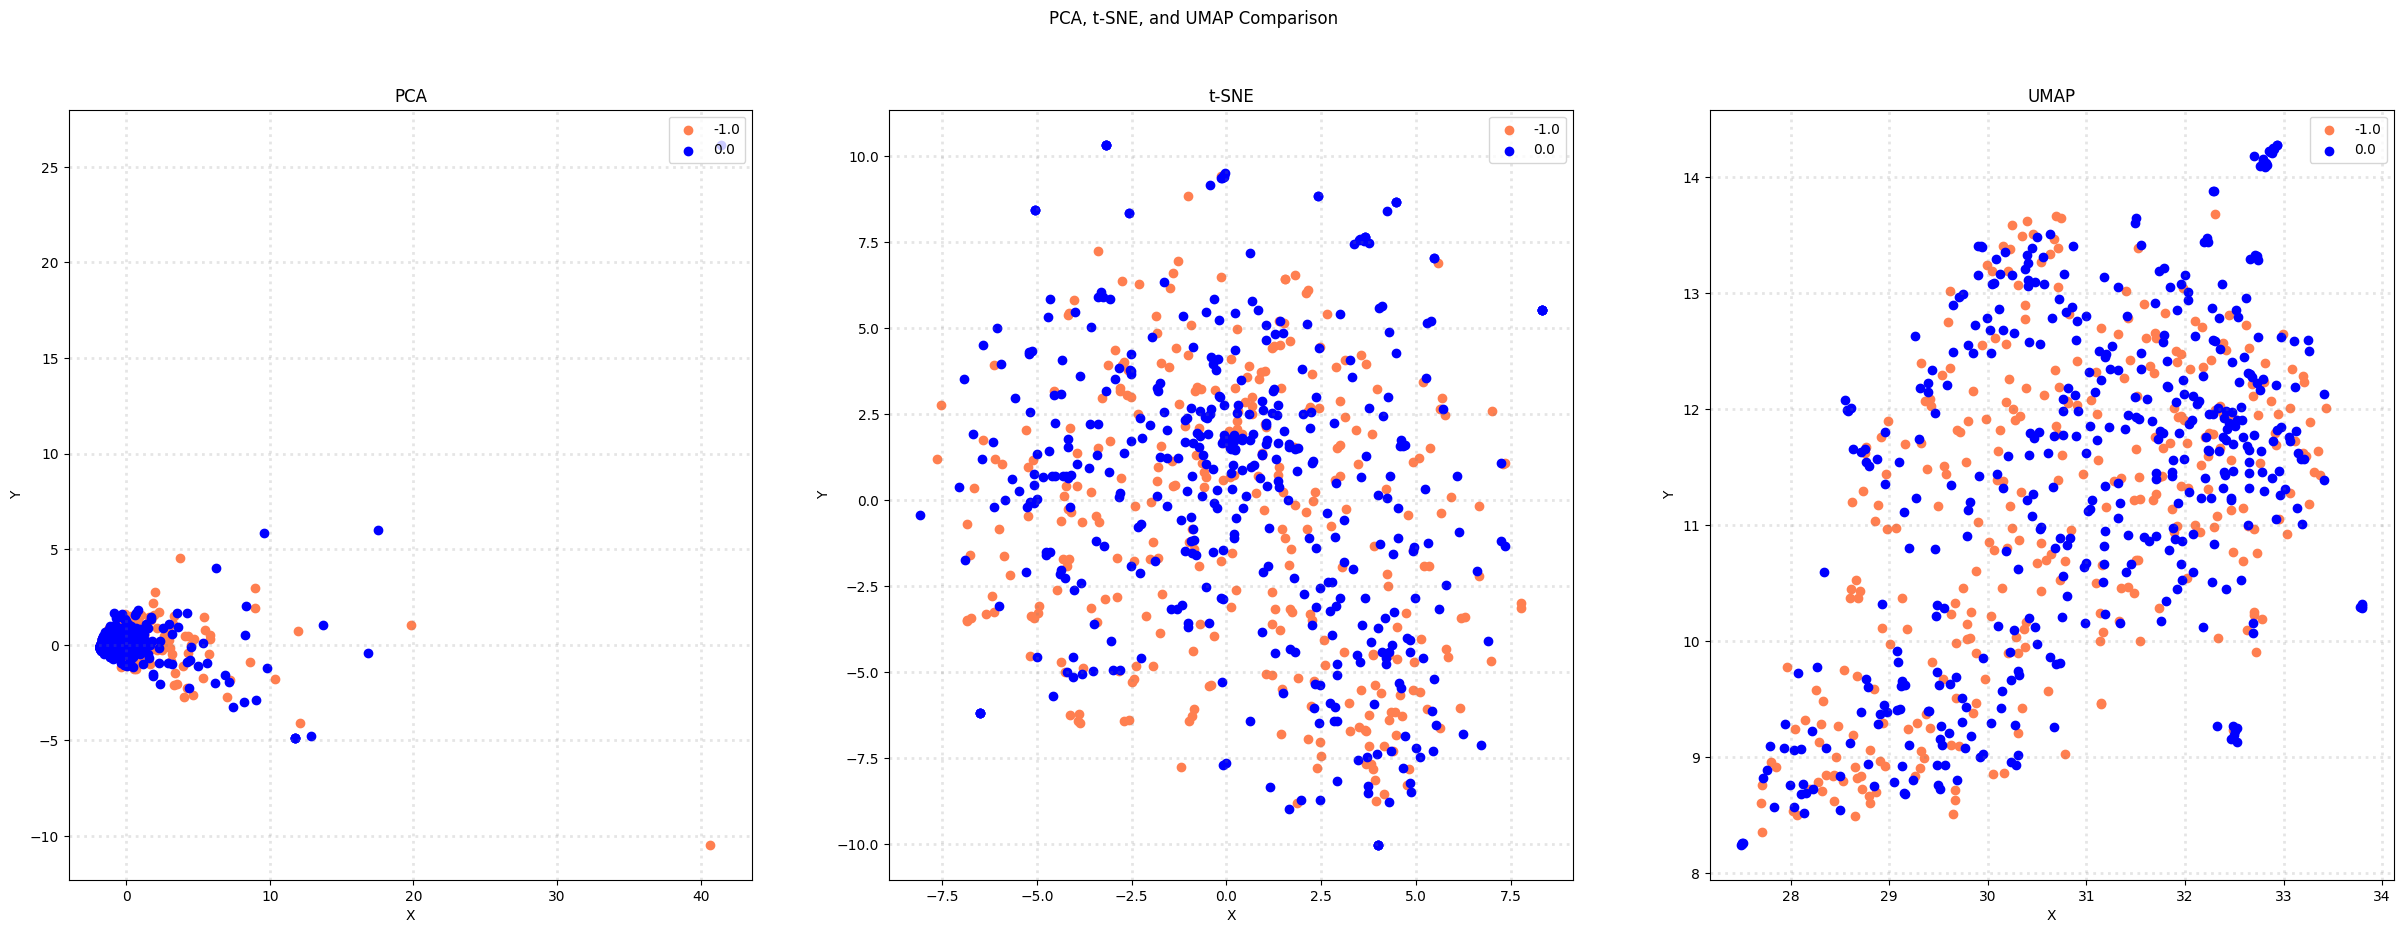

In [65]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = X['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['label'] == category].T[0]
        ys = X_reduced[X['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### Discretization and Binarization

In [66]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [67]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.label)


LabelBinarizer()

In [68]:
X['bin_label'] = mlb.transform(X['label']).tolist()

In [69]:
X[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,tokenized_text,bin_label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"{on, Calls, retards}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"{they, first, talk, did, ever., Stunt, why, ab...","[0, 1, 0]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"{of, in, ticker., Seeing, the, red, lots}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"{This, Partners, astonishing, mph, of, for, **...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"{say, you., didn’t, thank, He}","[1, 0, 0]"
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"{warm, in, ejaculate, puss, to, tonight,, wish...","[0, 1, 0]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"{tariffs., their, be, Powell., Jerome, I, are,...","[1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"{Its, this, months,, of, for, we, spread, not,...","[0, 1, 0]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"{handle, Third, held, I, line, folks., only, o...","[0, 0, 1]"


### Data Expoloration

In [70]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[105]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

In [71]:
print(document_to_transform_1)
print(document_to_transform_2)

["It's a copy/paste from a Bloomberg terminal."]
['\n\n  [World Markets (stockbuyvest.com)]()']


In [72]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)


# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)


# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())


Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [73]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)


cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)


# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})


print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


/var/folders/kx/m437w_zn5rgfvvxgpk4hgq880000gn/T/ipykernel_54918/2124044171.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kx/m437w_zn5rgfvvxgpk4hgq880000gn/T/ipykernel_54918/2124044171.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/kx/m437w_zn5rgfvvxgpk4hgq880000gn/T/ipykernel_54918/2124044171.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



### Data Classification

In [74]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

import numpy as np

# Ensure consistent order of labels
labels_sorted = np.sort(X['label'].unique())

# Map numeric labels to human-readable class names
label_name_map = { -1: "Negative", 0: "Neutral", 1: "Positive" }  # adjust if you only have -1 and 1

target_names = [label_name_map[lbl] for lbl in labels_sorted]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

In [75]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5854    0.7347    0.6516        98
     Neutral     0.6393    0.6446    0.6420       121
    Positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



In [79]:
# Now train with augmented data (original TDM + pattern matrix)

# 1. Combine original TDM with the pattern matrix

# Ensure both matrices have identical row ordering
print("Original TDM shape:", tdm_df.shape)
print("Pattern matrix shape:", pattern_matrix.shape)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
print("Augmented feature matrix shape:", augmented_df.shape)

# 2. Prepare target labels and category names

category_mapping = { -1: "Negative", 0: "Neutral", 1: "Positive" }  # adjust if you only have -1 and 1
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# 3. Split into training and testing sets (70/30)

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, 
    X['label'], 
    test_size=0.3, 
    random_state=42
)
print("Train size:", X_train_aug.shape, " Test size:", X_test_aug.shape)

# 4. Train Naive Bayes classifier

nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)

# 5. Predict and evaluate

y_pred_aug = nb_aug.predict(X_test_aug)

print("\n=== Naive Bayes with Augmented Data ===")
print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n",
      classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))


Original TDM shape: (847, 4346)
Pattern matrix shape: (847, 243)
Augmented feature matrix shape: (847, 4589)
Train size: (592, 4589)  Test size: (255, 4589)

=== Naive Bayes with Augmented Data ===
Accuracy: 0.5882352941176471

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5820    0.7245    0.6455        98
     Neutral     0.6311    0.6364    0.6337       121
    Positive     0.1818    0.0556    0.0851        36

    accuracy                         0.5882       255
   macro avg     0.4650    0.4721    0.4548       255
weighted avg     0.5488    0.5882    0.5608       255



/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



### Decision Tree Classifier

In [80]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    Negative     0.4878    0.4082    0.4444        98
     Neutral     0.5294    0.6694    0.5912       121
    Positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



Now train the decision tree with augmented data

In [81]:
#Answer
# 1. Combine TDM and Pattern Matrix
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
print("Augmented feature matrix shape:", augmented_df.shape)

# 2. Split augmented data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['label'], test_size=0.3, random_state=42
)

# 3. Train Decision Tree on augmented data
dt_aug = DecisionTreeClassifier(random_state=42)
dt_aug.fit(X_train_aug, y_train_aug)

# 4. Evaluate performance
y_pred_dt_aug = dt_aug.predict(X_test_aug)

print("\n=== Decision Tree with Augmented Data ===")
print("Accuracy:", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report:\n",
      classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

Augmented feature matrix shape: (847, 4589)

=== Decision Tree with Augmented Data ===
Accuracy: 0.4627450980392157

Classification Report:
               precision    recall  f1-score   support

    Negative     0.4500    0.3673    0.4045        98
     Neutral     0.4969    0.6529    0.5643       121
    Positive     0.1875    0.0833    0.1154        36

    accuracy                         0.4627       255
   macro avg     0.3781    0.3679    0.3614       255
weighted avg     0.4352    0.4627    0.4395       255



## 3. Third: please attempt the following tasks on **the new dataset**.

In [82]:
# Naive Bayes Classification Comparison on Reddit Stock Sentiment

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# 1.Load dataset and basic setup

df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df.columns = df.columns.str.strip().str.lower()

# Detect label column
label_col = 'label' if 'label' in df.columns else 'sentiment'
print(f"Using label column: {label_col}")

# Train/test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'].astype(str),
    df[label_col],
    test_size=0.3,
    random_state=42
)

# 2.CountVectorizer → word frequency features
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X_train_text)
X_test_counts = count_vect.transform(X_test_text)

nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train)
y_pred_count = nb_count.predict(X_test_counts)

print("\nNaive Bayes with Word Frequency (CountVectorizer)")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("Classification Report:\n",
      classification_report(y_test, y_pred_count, digits=4))

# 3.TF-IDF features → weights reflect importance, not raw counts
tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vect.fit_transform(X_train_text)
X_test_tfidf = tfidf_vect.transform(X_test_text)

# ComplementNB works better with TF-IDF (handles imbalance)
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("\n=== Naive Bayes with TF-IDF Features (ComplementNB) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n",
      classification_report(y_test, y_pred_tfidf, digits=4))

# 4.Augmented TF-IDF + Pattern features (if pattern_matrix exists)
if 'pattern_matrix' in locals():
    # Convert TF-IDF sparse matrix to dense DataFrame for concatenation
    tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
    pattern_train = pattern_matrix.loc[X_train_text.index] if hasattr(pattern_matrix, 'index') else pattern_matrix.iloc[:len(X_train_text)]
    pattern_test = pattern_matrix.iloc[len(X_train_text):]
    
    augmented_train = pd.concat([tfidf_df.reset_index(drop=True), pattern_train.reset_index(drop=True)], axis=1)
    augmented_test = pd.concat([pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out()).reset_index(drop=True),
                                pattern_test.reset_index(drop=True)], axis=1)
    
    nb_aug = ComplementNB()
    nb_aug.fit(augmented_train, y_train)
    y_pred_aug = nb_aug.predict(augmented_test)

    print("\n=== Naive Bayes with TF-IDF + Pattern Augmentation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred_aug))
    print("Classification Report:\n",
          classification_report(y_test, y_pred_aug, digits=4))
else:
    print("\n(Skip augmentation step: pattern_matrix not defined in this session.)")

Using label column: label

Naive Bayes with Word Frequency (CountVectorizer)
Accuracy: 0.5803921568627451
Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5478    0.6429    0.5915        98
         0.0     0.6103    0.6860    0.6459       121
         1.0     0.5000    0.0556    0.1000        36

    accuracy                         0.5804       255
   macro avg     0.5527    0.4615    0.4458       255
weighted avg     0.5707    0.5804    0.5480       255


=== Naive Bayes with TF-IDF Features (ComplementNB) ===
Accuracy: 0.5137254901960784
Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5082    0.6327    0.5636        98
         0.0     0.5517    0.5289    0.5401       121
         1.0     0.2941    0.1389    0.1887        36

    accuracy                         0.5137       255
   macro avg     0.4513    0.4335    0.4308       255
weighted avg     0.4986    0.5137    0.4995       255

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/aegidius/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



## 4. Fourth

In [ ]:

# 1. Text Cleaning Inefficiencies
# ------------------------------------------------------------
#   In the lab, we used raw 'text' strings without cleaning them.
#   Many Reddit posts contain URLs, emojis, hashtags, punctuation,
#   , and numbers that are not meaningful
#   for sentiment classification.
#   Improvement:
#     - Remove or normalize URLs, user mentions, and HTML artifacts.
#     - Convert all text to lowercase for consistency.
#     - Use regex cleaning to strip special characters, emojis,
#       and redundant spaces.

# 2.Tokenization and Stopword Handling
# ------------------------------------------------------------
#   The CountVectorizer/TfidfVectorizer default tokenizer splits
#   simply on whitespace. It does not handle contractions,
#   negations, or multi-word expressions properly.
#   Improvement:
#     - Use advanced tokenizers from NLTK, spaCy, or HuggingFace.
#     - Keep negations (e.g., "not good" should remain together).
#     - Add a custom stopword list relevant to finance/reddit